# Import pandas and numpy

In [2]:
import pandas as pd
import numpy as np
import glob
import os
from scipy import interpolate
%pylab inline
plt.style.use(r'\\fil-ask-004\python\mplstyle\4subsea.mplstyle')

Populating the interactive namespace from numpy and matplotlib


# Location of CS result files

In [125]:

riser3=glob.glob(r'C:\projects\21_1993_Pierce_fatigue_MARC\analysis\CS\NOV_8inch_GIR_3p_with_bs_g3_job1_*cb.csv')
riser2=glob.glob(r'C:\projects\21_1993_Pierce_fatigue_MARC\analysis\CS\NOV_8inch_GIR_3p_with_bs_g3_mod_sep_stress_job1_*cb.csv')


#pf=[f.split('_')[-1].replace('cb.csv', '') for f in files0bar_base]
#print (riser1[1:2])
#print(pf[250:])


#len(riser1)
#riser1.head(5)

In [60]:
def moment(filename):
    
    '''Get files
    
    filename: full path
    '''

    #print(os.path.basename(f))   
    data=pd.read_csv(f,sep=',')
    data=data[['inc','K3_4','Origo Z GCS','My.SUM','My.Bending_stiffener','My.End_fitting']]
#    data['bend stiff']=((data['My']/1.0E+6))
#    print(data)
    return data

In [83]:
def moment_new(filename):
    
    '''Get files
    
    filename: full path
    '''

    #print(os.path.basename(f))   
    data_new=pd.read_csv(f,sep=',')
    data_new=data_new[['inc','K3_4','Origo Z GCS','My.SUM','My.Bending_stiffener','My.End_fitting']]
#    data['bend stiff']=((data['My']/1.0E+6))
#    print(data_new)
    return data_new

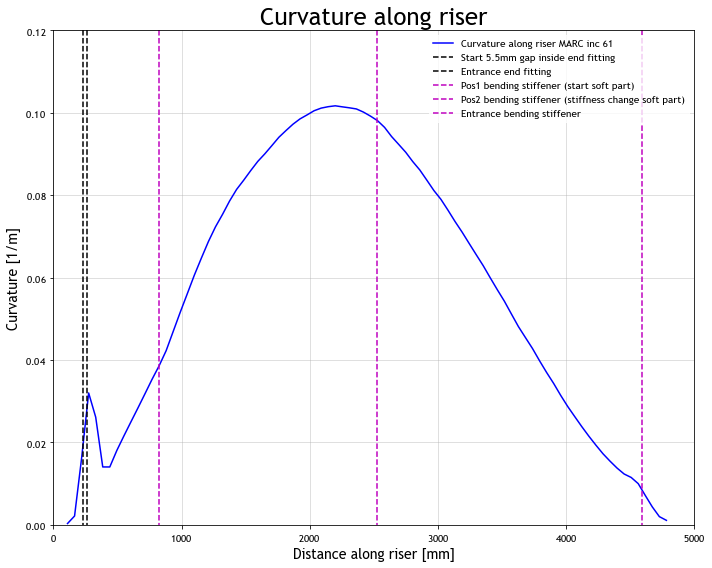

In [129]:
# bflex_results_fine_10p=pd.read_csv(r'C:\projects\20_1637_Snorre_OE_Marc_vs_Bflex\incomming_documents\element_results.csv', sep="\t")

plt.figure(figsize=(10,8))

#allres=[]
allres_b=[]
allres_c=[]

#for f in riser1[0:500]:
#    allres.append(moment(f))
#allres=pd.concat(allres)

for f in riser2[0:500]:
    allres_b.append(moment_new(f))
allres_b=pd.concat(allres_b)

for f in riser3[0:500]:
    allres_c.append(moment(f))
allres_c=pd.concat(allres_c)

#allres.to_csv('allres.csv')
#allres_b.to_csv('allres_b.csv')
#allres_c.to_csv('allres_c.csv')

#allres1=allres.sort_values(by=['Origo Z GCS'])
#allres_inc1 = allres1[allres1['inc']==0]
#allres_inc106 = allres1[allres1['inc']==52]

inc2=61

allres2=allres_b.sort_values(by=['Origo Z GCS'])
allres2_inc1 = allres2[allres2['inc']==0]
allres2_inc106 = allres2[allres2['inc']==inc2]

inc3=61

allres3=allres_c.sort_values(by=['Origo Z GCS'])
allres3_inc1 = allres3[allres3['inc']==0]
allres3_inc106 = allres3[allres3['inc']==inc3]


plt.plot(allres3_inc1['Origo Z GCS'][1:-2], allres3_inc106['K3_4'][1:-2]*1.0,label=f'Curvature along riser MARC inc {inc3}',linestyle='-',color='b')
#plt.plot(allres2_inc1['Origo Z GCS'][1:-2], allres2_inc106['K3_4'][1:-2]*1.0,label=f'Curvature along riser MARC inc {inc2} mod sep stress',linestyle='-',color='r')



plt.plot([265,265],[0.12,0.0],label='Start 5.5mm gap inside end fitting',linestyle='--',color='black')
plt.plot([230,230],[0.12,0.0],label='Entrance end fitting',linestyle='--',color='black')
plt.plot([825,825],[0.12,0.0],label='Pos1 bending stiffener (start soft part)',linestyle='--',color='m')
plt.plot([2525,2525],[0.12,0.0],label='Pos2 bending stiffener (stiffness change soft part)',linestyle='--',color='m')
plt.plot([4594,4594],[0.12,0.0],label='Entrance bending stiffener',linestyle='--',color='m')



plt.legend(loc=0)
plt.xlim([0.,5000.])
plt.ylim([0.,0.12])
plt.xlabel('Distance along riser [mm]',fontsize = 14)
plt.ylabel('Curvature [1/m]',fontsize = 14)
plt.title('Curvature along riser',fontsize = 24)

plt.tight_layout()

#kalle=allres3_inc1['Origo Z GCS'][1:-6]
#lisa=allres3_inc106['K1_2'][1:-6]*1.0

#lisa.to_clipboard()

In [133]:
bflex_results_fine_10p.head(5)

,Unnamed: 0,x_node,curvature,moment_total,moment_pipe
0,0,24.4,0.000237,324.328,5.204424
1,1,73.2,0.000232,318.069,5.104002
2,2,122.0,0.000228,311.811,5.003580
3,3,170.8,0.000223,305.553,4.903157
4,4,219.6,0.000219,299.296,4.802735


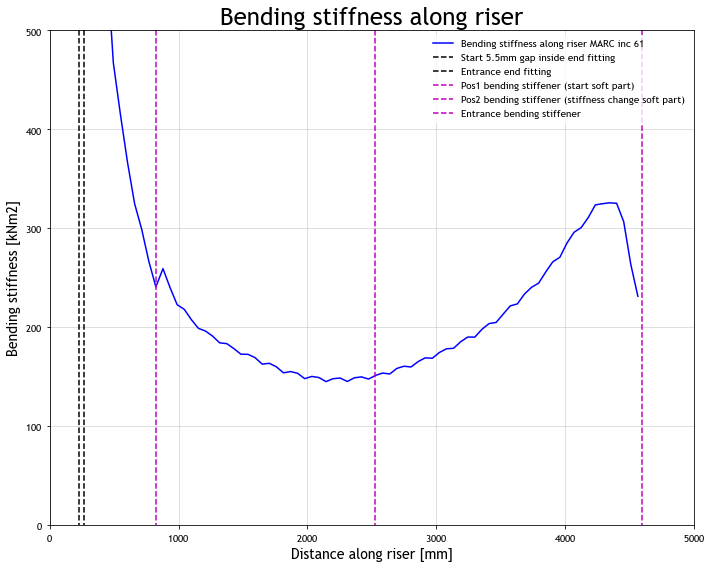

In [130]:
#bflex_results_fine_10p=pd.read_csv(r'C:\projects\20_1637_Snorre_OE_Marc_vs_Bflex\incomming_documents\element_results.csv', sep="\t")

plt.figure(figsize=(10,8))

#allres=[]
allres_b=[]
allres_c=[]

#for f in riser1[0:500]:
#    allres.append(moment(f))
#allres=pd.concat(allres)

for f in riser2[0:500]:
    allres_b.append(moment_new(f))
allres_b=pd.concat(allres_b)

for f in riser3[0:500]:
    allres_c.append(moment(f))
allres_c=pd.concat(allres_c)

#allres.to_csv('allres.csv')
#.to_csv('allres_b.csv')
#allres_c.to_csv('allres_c.csv')

#allres1=allres.sort_values(by=['Origo Z GCS'])
#allres_inc1 = allres1[allres1['inc']==0]
#allres_inc106 = allres1[allres1['inc']==52]

inc2=61

allres2=allres_b.sort_values(by=['Origo Z GCS'])
allres2_inc1 = allres2[allres2['inc']==0]
allres2_inc106 = allres2[allres2['inc']==inc2]

inc3=61

allres3=allres_c.sort_values(by=['Origo Z GCS'])
allres3_inc1 = allres3[allres3['inc']==0]
allres3_inc106 = allres3[allres3['inc']==inc3]


plt.plot(allres3_inc1['Origo Z GCS'][6:-6], ((allres3_inc106['My.SUM']-allres3_inc106['My.Bending_stiffener']-allres3_inc106['My.End_fitting'])[6:-6]/1e6)/allres3_inc106['K3_4'][6:-6],label=f'Bending stiffness along riser MARC inc {inc3}',linestyle='-',color='b')
#plt.plot(allres2_inc1['Origo Z GCS'][6:-6], ((allres2_inc106['My.SUM']-allres2_inc106['My.Bending_stiffener']-allres2_inc106['My.End_fitting'])[6:-6]/1e6)/allres2_inc106['K3_4'][6:-6],label=f'Bending stiffness along riser MARC inc {inc2} mod sep stress',linestyle='-',color='r')



plt.plot([265,265],[500,0.0],label='Start 5.5mm gap inside end fitting',linestyle='--',color='black')
plt.plot([230,230],[500,0.0],label='Entrance end fitting',linestyle='--',color='black')
plt.plot([825,825],[500,0.0],label='Pos1 bending stiffener (start soft part)',linestyle='--',color='m')
plt.plot([2525,2525],[500,0.0],label='Pos2 bending stiffener (stiffness change soft part)',linestyle='--',color='m')
plt.plot([4594,4594],[500,0.0],label='Entrance bending stiffener',linestyle='--',color='m')



plt.legend(loc=0)
plt.xlim([0.,5000.])
plt.ylim([0.,500])
plt.xlabel('Distance along riser [mm]',fontsize = 14)
plt.ylabel('Bending stiffness [kNm2]',fontsize = 14)
plt.title('Bending stiffness along riser',fontsize = 24)

plt.tight_layout()


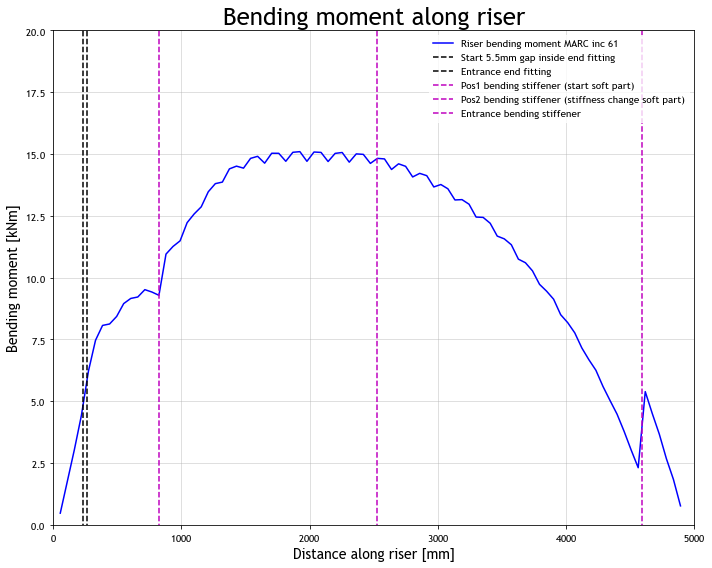

In [131]:
#bflex_results_fine_10p=pd.read_csv(r'C:\projects\20_1637_Snorre_OE_Marc_vs_Bflex\incomming_documents\element_results.csv', sep="\t")


plt.figure(figsize=(10,8))


#allres=[]
allres_b=[]
allres_c=[]

#for f in riser1[0:500]:
#    allres.append(moment(f))
#allres=pd.concat(allres)

for f in riser2[0:500]:
    allres_b.append(moment_new(f))
allres_b=pd.concat(allres_b)

for f in riser3[0:500]:
    allres_c.append(moment(f))
allres_c=pd.concat(allres_c)

#allres.to_csv('allres.csv')
#allres_b.to_csv('allres_b.csv')
#allres_c.to_csv('allres_c.csv')

#allres1=allres.sort_values(by=['Origo Z GCS'])
#allres_inc1 = allres1[allres1['inc']==0]
#allres_inc106 = allres1[allres1['inc']==52]

inc2=61

allres2=allres_b.sort_values(by=['Origo Z GCS'])
allres2_inc1 = allres2[allres2['inc']==0]
allres2_inc106 = allres2[allres2['inc']==inc2]

inc3=61

allres3=allres_c.sort_values(by=['Origo Z GCS'])
allres3_inc1 = allres3[allres3['inc']==0]
allres3_inc106 = allres3[allres3['inc']==inc3]

#allres_inc106.to_csv('allres_inc106.csv')

plt.plot(allres3_inc1['Origo Z GCS'], (allres3_inc106['My.SUM']-allres3_inc106['My.Bending_stiffener']-allres3_inc106['My.End_fitting'])/1e6,label=f'Riser bending moment MARC inc {inc3}',linestyle='-',color='b')
#plt.plot(allres2_inc1['Origo Z GCS'], (allres2_inc106['My.SUM']-allres2_inc106['My.Bending_stiffener']-allres2_inc106['My.End_fitting'])/1e6,label=f'Riser bending moment MARC inc {inc2} mod sep stress',linestyle='-',color='r')


plt.plot([265,265],[500,0.0],label='Start 5.5mm gap inside end fitting',linestyle='--',color='black')
plt.plot([230,230],[500,0.0],label='Entrance end fitting',linestyle='--',color='black')
plt.plot([825,825],[500,0.0],label='Pos1 bending stiffener (start soft part)',linestyle='--',color='m')
plt.plot([2525,2525],[500,0.0],label='Pos2 bending stiffener (stiffness change soft part)',linestyle='--',color='m')
plt.plot([4594,4594],[500,0.0],label='Entrance bending stiffener',linestyle='--',color='m')


plt.legend(loc=0)
plt.xlim([0.,5000.])
plt.ylim([0.,20.])
plt.xlabel('Distance along riser [mm]',fontsize = 14)
plt.ylabel('Bending moment [kNm]',fontsize = 14)
plt.title('Bending moment along riser',fontsize = 24)

plt.tight_layout()


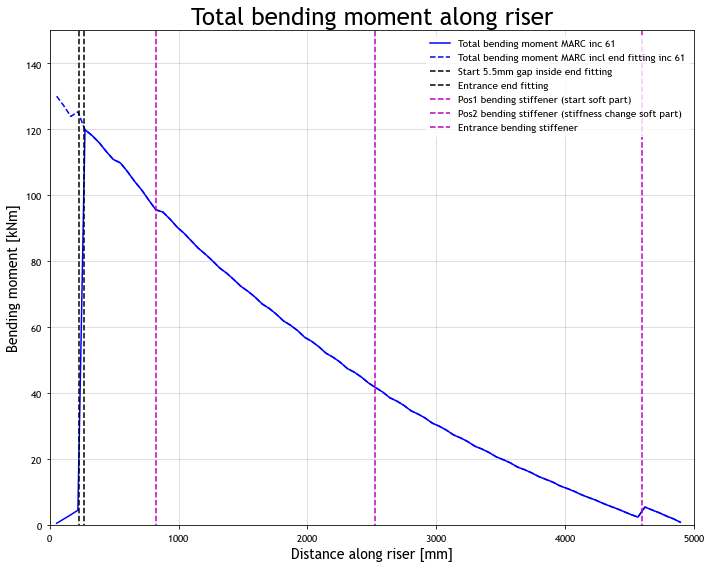

In [133]:
#bflex_results_fine_10p=pd.read_csv(r'C:\projects\20_1637_Snorre_OE_Marc_vs_Bflex\incomming_documents\element_results.csv', sep="\t")

plt.figure(figsize=(10,8))

#allres=[]
allres_b=[]
allres_c=[]

#for f in riser1[0:500]:
#    allres.append(moment(f))
#allres=pd.concat(allres)

for f in riser2[0:500]:
    allres_b.append(moment_new(f))
allres_b=pd.concat(allres_b)
    
for f in riser3[0:500]:
    allres_c.append(moment(f))
allres_c=pd.concat(allres_c)

#allres.to_csv('allres.csv')
#allres_b.to_csv('allres_b.csv')
#allres_c.to_csv('allres_c.csv')

#allres1=allres.sort_values(by=['Origo Z GCS'])
#allres_inc1 = allres1[allres1['inc']==0]
#allres_inc106 = allres1[allres1['inc']==52]

inc2=1

allres2=allres_b.sort_values(by=['Origo Z GCS'])
allres2_inc1 = allres2[allres2['inc']==0]
allres2_inc106 = allres2[allres2['inc']==inc2]

inc3=61

allres3=allres_c.sort_values(by=['Origo Z GCS'])
allres3_inc1 = allres3[allres3['inc']==0]
allres3_inc106 = allres3[allres3['inc']==inc3]


#allres_inc106.to_csv('allres_inc106.csv')

plt.plot(allres3_inc1['Origo Z GCS'], (allres3_inc106['My.SUM']-allres3_inc106['My.End_fitting'])/1e6,label=f'Total bending moment MARC inc {inc3}',linestyle='-',color='b')
plt.plot(allres3_inc1['Origo Z GCS'], (allres3_inc106['My.SUM'])/1e6,label=f'Total bending moment MARC incl end fitting inc {inc3}',linestyle='--',color='b')

#plt.plot(allres2_inc1['Origo Z GCS'], (allres2_inc106['My.SUM']-allres2_inc106['My.End_fitting'])/1e6,label=f'Total bending moment MARC inc {inc2} mod sep stress',linestyle='-',color='r')
#plt.plot(allres2_inc1['Origo Z GCS'], (allres2_inc106['My.SUM'])/1e6,label=f'Total bending moment MARC incl end fitting inc {inc2} mod sep stress',linestyle='--',color='r')



plt.plot([265,265],[500,0.0],label='Start 5.5mm gap inside end fitting',linestyle='--',color='black')
plt.plot([230,230],[500,0.0],label='Entrance end fitting',linestyle='--',color='black')
plt.plot([825,825],[500,0.0],label='Pos1 bending stiffener (start soft part)',linestyle='--',color='m')
plt.plot([2525,2525],[500,0.0],label='Pos2 bending stiffener (stiffness change soft part)',linestyle='--',color='m')
plt.plot([4594,4594],[500,0.0],label='Entrance bending stiffener',linestyle='--',color='m')



plt.legend(loc=0)
plt.xlim([0.,5000.])
plt.ylim([0.,150.])
plt.xlabel('Distance along riser [mm]',fontsize = 14)
plt.ylabel('Bending moment [kNm]',fontsize = 14)
plt.title('Total bending moment along riser',fontsize = 24)

plt.tight_layout()
